In [2]:
# Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

sns.set(style='darkgrid')
print("Libraries imported.")

Libraries imported.


In [3]:
# %pip install --upgrade yfinance

In [4]:
# Download the data set
tickers = ['AZN.L','HSBA.L','SHEL.L','ULVR.L','BP.L','DGE.L','GSK.L','BATS.L','RIO.L','REL.L']

df = yf.download(tickers, start="2023-01-01", group_by='ticker')
print('Columns in downloaded data:')
print(df.columns)

# Check if data is empty
if df.empty:
    print("Downloaded dataframe is empty. Please check ticker symbols or network connection.")
else:
    # Try to extract 'Close' prices
    try:
        if isinstance (df.columns, pd.MultiIndex):
            close = pd.concat([df[ticker]['Close'] for ticker in tickers], axis=1)
        else:
            close = df['Close']
            
        close = close.dropna(how='all')
        print('\nFirst few rows of close price data:')
        print(close.head())
    except Exception as e:
        print(f"Error extracting 'Close' prices: {e}")


C:\Users\Legion\AppData\Local\Temp\ipykernel_19620\2370258125.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2023-01-01", group_by='ticker')
[*********************100%***********************]  10 of 10 completed

Columns in downloaded data:
MultiIndex([('HSBA.L',   'Open'),
            ('HSBA.L',   'High'),
            ('HSBA.L',    'Low'),
            ('HSBA.L',  'Close'),
            ('HSBA.L', 'Volume'),
            ('ULVR.L',   'Open'),
            ('ULVR.L',   'High'),
            ('ULVR.L',    'Low'),
            ('ULVR.L',  'Close'),
            ('ULVR.L', 'Volume'),
            ('SHEL.L',   'Open'),
            ('SHEL.L',   'High'),
            ('SHEL.L',    'Low'),
            ('SHEL.L',  'Close'),
            ('SHEL.L', 'Volume'),
            ( 'DGE.L',   'Open'),
            ( 'DGE.L',   'High'),
            ( 'DGE.L',    'Low'),
            ( 'DGE.L',  'Close'),
            ( 'DGE.L', 'Volume'),
            ('BATS.L',   'Open'),
            ('BATS.L',   'High'),
            ('BATS.L',    'Low'),
            ('BATS.L',  'Close'),
            ('BATS.L', 'Volume'),
            ( 'GSK.L',   'Open'),
            ( 'GSK.L',   'High'),
            ( 'GSK.L',    'Low'),
            ( 'GSK.L

In [5]:
# use this code as it puts the price types together

data = yf.download(tickers, start='2020-01-01', group_by='column')
print('Columns in downloaded data:')
print(data.columns)
print('\nFirst few rows of data:')
print(data.head())
# Use 'Close' prices since 'Adj Close' is not available for Indian stocks
if 'Close' in data.columns.get_level_values(0):
    close = data.xs('Close', axis=1, level=0).dropna()
    print('\nFirst few rows of Close price data:')
    print(close.head())
else:
    raise ValueError("'Close' not found in data columns.")

C:\Users\Legion\AppData\Local\Temp\ipykernel_19620\2271092551.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', group_by='column')
[*********************100%***********************]  10 of 10 completed


Columns in downloaded data:
MultiIndex([( 'Close',  'AZN.L'),
            ( 'Close', 'BATS.L'),
            ( 'Close',   'BP.L'),
            ( 'Close',  'DGE.L'),
            ( 'Close',  'GSK.L'),
            ( 'Close', 'HSBA.L'),
            ( 'Close',  'REL.L'),
            ( 'Close',  'RIO.L'),
            ( 'Close', 'SHEL.L'),
            ( 'Close', 'ULVR.L'),
            (  'High',  'AZN.L'),
            (  'High', 'BATS.L'),
            (  'High',   'BP.L'),
            (  'High',  'DGE.L'),
            (  'High',  'GSK.L'),
            (  'High', 'HSBA.L'),
            (  'High',  'REL.L'),
            (  'High',  'RIO.L'),
            (  'High', 'SHEL.L'),
            (  'High', 'ULVR.L'),
            (   'Low',  'AZN.L'),
            (   'Low', 'BATS.L'),
            (   'Low',   'BP.L'),
            (   'Low',  'DGE.L'),
            (   'Low',  'GSK.L'),
            (   'Low', 'HSBA.L'),
            (   'Low',  'REL.L'),
            (   'Low',  'RIO.L'),
            (   'Low

In [6]:
# Here we grouped by the tickers
df.head() 

Ticker          HSBA.L                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2023-01-03  517.010471  530.581908  514.615554  528.785706  33285725   
2023-01-04  533.974636  543.654248  531.380128  542.356995  21604090   
2023-01-05  546.847480  567.204601  544.251938  564.111084  36654670   
2023-01-06  564.809667  568.651546  558.423102  567.404175  31225164   
2023-01-09  563.312818  565.607969  560.418892  562.015564  23530081   

Ticker           ULVR.L                                                  ...  \
Price              Open         High          Low        Close   Volume  ...   
Date                                                                     ...   
2023-01-03  4155.056637  4202.511600  4140.570385  4189.523926  5548910  ...   
2023-01-04  4194.020169  4243.972767  4194.020169  4222.992676  2689606  ...   
2023-01-05  4208.007640  4230.985839  4175.538445  4197.018066  2898487  ...   
2023-01-06  4209.506694  4216.500059  4183.631338  4197.518066  2947334  ...   
2023-01-09  4198.016802  4198.016802  4149.562777  4191.023438  5403367  ...   

Ticker            REL.L                                                  \
Price              Open         High          Low        Close   Volume   
Date                                                                      
2023-01-03  2289.739273  2332.715611  2275.746978  2305.730469  3470713   
2023-01-04  2320.721911  2369.694940  2314.725213  2363.698242  4544974   
2023-01-05  2354.703524  2359.700773  2324.720033  2325.719482  2564631   
2023-01-06  2333.714852  2346.707697  2315.724759  2341.710449  2500178   
2023-01-09  2345.708543  2350.705792  2305.730553  2330.716797  3037690   

Ticker            RIO.L                                                  
Price              Open         High          Low        Close   Volume  
Date                                                                     
2023-01-03  5807.196709  5894.035161  5799.211564  5828.157715  2112533  
2023-01-04  5899.025787  5929.968223  5782.243043  5834.146484  2194621  
2023-01-05  5864.090428  5962.906590  5826.081063  5928.969727  2466006  
2023-01-06  5982.869817  6057.730551  5982.749923  6046.750977  4554200  
2023-01-09  6064.716820  6113.625827  6018.802242  6079.688965  4454951  

[5 rows x 50 columns]

In [7]:
# Here we grouped by the price types
data.head()

Price             Close                                                     \
Ticker            AZN.L       BATS.L        BP.L        DGE.L        GSK.L   
Date                                                                         
2020-01-02  7649.160645  3250.487061  479.362122  3177.575439  1785.046753   
2020-01-03  7689.104004  3337.101074  492.521240  3184.064453  1792.278564   
2020-01-06  7612.212891  3335.109863  502.540161  3178.074219  1778.217041   
2020-01-07  7634.181641  3390.861084  497.256592  3179.072998  1770.181396   
2020-01-08  7615.208008  3454.078613  492.770508  3203.032227  1779.020386   

Price                                                                       \
Ticker          HSBA.L        REL.L        RIO.L       SHEL.L       ULVR.L   
Date                                                                         
2020-01-02  593.376221  1900.603760  4505.227539  2251.217529  4338.266113   
2020-01-03  592.678223  1907.595093  4482.833496  2293.118896  4348.246582   
2020-01-06  583.505005  1896.109131  4409.181641  2303.594238  4315.812012   
2020-01-07  581.710266  1890.616211  4419.133301  2285.136963  4278.886230   
2020-01-08  579.616333  1897.607300  4478.852051  2270.172607  4231.481934   

Price       ...   Volume                                                     \
Ticker      ...    AZN.L   BATS.L        BP.L      DGE.L    GSK.L    HSBA.L   
Date        ...                                                               
2020-01-02  ...  1704325  2320801  25049010.0  2671915.0  5240867  17220449   
2020-01-03  ...  1090818  5176894  42354025.0  2934398.0  4363611  16976787   
2020-01-06  ...  1348181  4227582  47220192.0  2716264.0  5519354  18984368   
2020-01-07  ...  1308820  2965723  46243068.0  3553482.0  5204425  14960529   
2020-01-08  ...  1256533  4513672  37974090.0  4347825.0  5402486  20405597   

Price                                           
Ticker        REL.L    RIO.L   SHEL.L   ULVR.L  
Date                                            
2020-01-02  2979428  1333330  4710773  1598368  
2020-01-03  2274680  1654325  4984931  1628391  
2020-01-06  3187332  3030142  7332363  1473368  
2020-01-07  2617906  1751025  5726726  2330297  
2020-01-08  2973038  2021798  7149697  2217486  

[5 rows x 50 columns]

In [8]:
#df.to_csv('Top 10 UK Stocks.csv')

df = pd.read_csv('Top 10 UK Stocks.csv')

df.head()

,Price,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,Close.7,Close.8,...,Volume,Volume.1,Volume.2,Volume.3,Volume.4,Volume.5,Volume.6,Volume.7,Volume.8,Volume.9
0,Ticker,AZN.L,BATS.L,BP.L,DGE.L,GSK.L,HSBA.L,REL.L,RIO.L,SHEL.L,...,AZN.L,BATS.L,BP.L,DGE.L,GSK.L,HSBA.L,REL.L,RIO.L,SHEL.L,ULVR.L
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,7649.16015625,3250.986572265625,479.3620910644531,3178.703125,1785.047119140625,593.5121459960938,1900.6038818359375,4507.03271484375,2251.13916015625,...,1704325,2320801,25049010.0,2671915.0,5240867,17220449,2979428,1333330,4710773,1598368
3,2020-01-03,7689.1044921875,3337.614501953125,492.5213317871094,3185.19384765625,1792.2786865234375,592.81396484375,1907.594482421875,4484.62841796875,2293.039794921875,...,1090818,5176894,42354025.0,2934398.0,4363611,16976787,2274680,1654325,4984931,1628391
4,2020-01-06,7612.21337890625,3335.62255859375,502.5401916503906,3179.201904296875,1778.2169189453125,583.6384887695312,1896.1094970703125,4410.94677734375,2303.51513671875,...,1348181,4227582,47220192.0,2716264.0,5519354,18984368,3187332,3030142,7332363,1473368


In [9]:
# EMA cslculation and signal generation functions

def calculate_ema(series, short=12, long=26):
    ema_short = series.ewm(span=short, adjust=False).mean()
    ema_long = series.ewm(span=long, adjust=False).mean()
    return ema_short, ema_long


def generate_signals(DF, short_col, long_col ):
    DF['Signal'] = np.where(DF[short_col] > DF[long_col], 1,0)
    DF['Position'] = DF['Signal'].diff()
    return DF

print('Functions for EMA calculation and Signal gemeration defined')

Functions for EMA calculation and Signal gemeration defined


             Close       EMA_12       EMA_26  Signal  Position
Date                                                          
2025-10-27  3510.0  3452.112391  3453.159040       0       0.0
2025-10-28  3498.0  3459.172023  3456.480592       1       1.0
2025-10-29  3396.0  3449.453250  3452.000548       0      -1.0
2025-10-30  3374.0  3437.845058  3446.222730       0       0.0
2025-10-31  3357.0  3425.407357  3439.613639       0       0.0


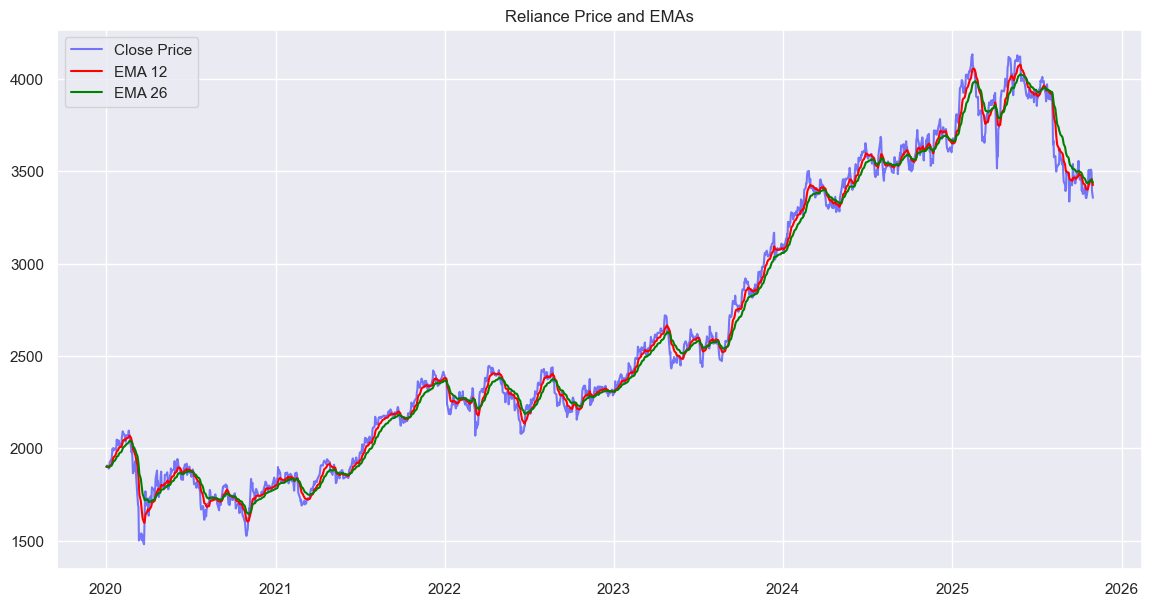

In [10]:
# Calculate and Plot EMAs for one stock
short_period = 12
long_period = 26
reliance_close = close['REL.L']
ema_short, ema_long = calculate_ema(reliance_close, short_period, long_period)

ema_df = pd.DataFrame({
    'Close': reliance_close,
    f'EMA_{short_period}': ema_short,
    f'EMA_{long_period}': ema_long
})

ema_df = generate_signals(ema_df, f'EMA_{short_period}', f'EMA_{long_period}')
print(ema_df.tail())

plt.figure(figsize=(14,7))
plt.plot(ema_df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(ema_df[f'EMA_{short_period}'], label=f'EMA {short_period}', color='red')
plt.plot(ema_df[f'EMA_{long_period}'], label=f'EMA {long_period}', color='green')   
plt.title('Reliance Price and EMAs')
plt.legend()
plt.show()

In [11]:
# Using plotly for interactive plots
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.03, subplot_titles=('Price with EMAs', 'Trading Signals'),
                    row_width=[0.2, 0.7])

# Add price and EMA traces
fig.add_trace(go.Scatter(x=ema_df.index, y=ema_df['Close'], name='Close Price', line=dict(color='blue', width=2)), row=1, col=1)
fig.add_trace(go.Scatter(x=ema_df.index, y=ema_df[f'EMA_{short_period}'], name=f'EMA {short_period}', line=dict(color='red', width=2)), row=1, col=1)
fig.add_trace(go.Scatter(x=ema_df.index, y=ema_df[f'EMA_{long_period}'], name=f'EMA {long_period}', line=dict(color='green', width=2)), row=1, col=1)

# Add buy/sell signals
buy_signals = ema_df[ema_df['Signal'] == 1]
sell_signals = ema_df[ema_df['Signal'] == -1]
fig.add_trace(go.Scatter(x=buy_signals.index, y=buy_signals['Close'], mode='markers', name='Buy Signal', marker=dict(color='green', size=10)), row=2, col=1)
fig.add_trace(go.Scatter(x=sell_signals.index, y=sell_signals['Close'], mode='markers', name='Sell Signal', marker=dict(color='red', size=10)), row=2, col=1)

fig.update_layout(title='Reliance Price and EMAs with Trading Signals', height=800)

In [38]:
#Grid search for best EMA parameters and strategy evaluation (All tickers)

short_range = range(5, 21, 2)
long_range = range(20, 51, 5)
summary = []
all_signals = {}

for ticker in tickers:
    print(f'\n Processing {ticker}')
    price_series = close[ticker]
    best_result = None
    best_return = -np.inf
    
    # Grid search for best EMA parameters
    for s, l in product(short_range, long_range):
        if s >= l:
            continue
        ema_s, ema_l = calculate_ema(price_series, short=s, long=l)
        temp = pd.DataFrame({'Close': price_series})
        temp['EMA_short'] = ema_s
        temp['EMA_long'] = ema_l
        temp = generate_signals(temp, 'EMA_short', 'EMA_long')
        temp['Strategy'] = temp['Close'].pct_change() * temp['Signal'].shift(1)
        total_return = (temp['Strategy'] + 1).prod() - 1
        
        if total_return > best_return:
            best_return = total_return
            best_result = {'short': s, 'long': l, 'return': total_return}
            
    best_short = best_result['short']
    best_long = best_result['long']
            
    ema_s, ema_l = calculate_ema(price_series, short=best_short, long=best_long)
    signals = pd.DataFrame({'Close': price_series})
            
    signals[f'EMA_{best_short}'] = ema_s
    signals[f'EMA_{best_long}'] = ema_l
    
    signals = generate_signals(signals, f"EMA_{best_short}", f"EMA_{best_long}")
    signals['Strategy_Returns'] = signals['Close'].pct_change() * signals['Signal']
    signals['Cumulative'] = (signals['Strategy_Returns'] + 1).cumprod()
    total_return = signals['Cumulative'].iloc[-1] - 1
    sharpe = signals['Strategy_Returns'].mean() / signals['Strategy_Returns'].std()
    cum_max = signals['Cumulative'].cummax()
    drawdown = (signals['Cumulative'] - cum_max) / cum_max
    max_drawdown = drawdown.min()
            
    summary.append({
                'Ticker': ticker,
                'Best Short EMA': best_short,
                'Best Long EMA': best_long,
                'Total Return': total_return,
                'Sharpe Ratio': sharpe,
                'Max Drawdown': max_drawdown
            })
    all_signals[ticker] = signals
    print(f'Best Short EMA: {best_short}, Best Long EMA: {best_long}, Return: {best_return * 100:.2f}%, Sharpe: {sharpe:.2f}, Max Drawdown: {max_drawdown:.2%}')


 Processing AZN.L
Best Short EMA: 7, Best Long EMA: 25, Return: 22.72%, Sharpe: 0.07, Max Drawdown: -9.42%

 Processing HSBA.L
Best Short EMA: 9, Best Long EMA: 35, Return: 92.33%, Sharpe: 0.07, Max Drawdown: -18.96%

 Processing SHEL.L
Best Short EMA: 15, Best Long EMA: 45, Return: 17.45%, Sharpe: 0.03, Max Drawdown: -22.40%

 Processing ULVR.L
Best Short EMA: 9, Best Long EMA: 45, Return: -16.35%, Sharpe: 0.04, Max Drawdown: -12.93%

 Processing BP.L
Best Short EMA: 15, Best Long EMA: 30, Return: 11.81%, Sharpe: 0.03, Max Drawdown: -18.38%

 Processing DGE.L
Best Short EMA: 5, Best Long EMA: 20, Return: -28.86%, Sharpe: 0.07, Max Drawdown: -12.94%

 Processing GSK.L
Best Short EMA: 11, Best Long EMA: 20, Return: 28.20%, Sharpe: 0.07, Max Drawdown: -10.08%

 Processing BATS.L
Best Short EMA: 19, Best Long EMA: 45, Return: 7.49%, Sharpe: 0.03, Max Drawdown: -22.66%

 Processing RIO.L
Best Short EMA: 5, Best Long EMA: 25, Return: 19.15%, Sharpe: 0.08, Max Drawdown: -14.73%

 Processing

In [39]:
# Summary of the Table
summary_df = pd.DataFrame(summary)

display(summary_df.style.format({
    'Total Return': '{:.2%}',      
    'Sharpe Ratio': '{:.2f}',      
    'Max Drawdown': '{:.2%}'       
}))


,Ticker,Best Short EMA,Best Long EMA,Total Return,Sharpe Ratio,Max Drawdown
0,AZN.L,7,25,192.32%,0.07,-9.42%
1,HSBA.L,9,35,235.21%,0.07,-18.96%
2,SHEL.L,15,45,53.89%,0.03,-22.40%
3,ULVR.L,9,45,46.54%,0.04,-12.93%
4,BP.L,15,30,66.61%,0.03,-18.38%
5,DGE.L,5,20,138.78%,0.07,-12.94%
6,GSK.L,11,20,158.21%,0.07,-10.08%
7,BATS.L,19,45,54.76%,0.03,-22.66%
8,RIO.L,5,25,310.44%,0.08,-14.73%
9,REL.L,19,50,39.58%,0.03,-17.66%


In [40]:
signals.head()

,Close,EMA_19,EMA_50,Signal,Position,Strategy_Returns,Cumulative
Date,,,,,,,
2020-01-02,1900.603760,1900.603760,1900.603760,0,NaN,NaN,NaN
2020-01-03,1907.595093,1901.302893,1900.877930,1,1.0,0.003678,1.003678
2020-01-06,1896.109131,1900.783517,1900.690918,1,0.0,-0.006021,0.997635
2020-01-07,1890.616211,1899.766786,1900.295831,0,-1.0,-0.000000,0.997635
2020-01-08,1897.607300,1899.550838,1900.190399,0,0.0,0.000000,0.997635


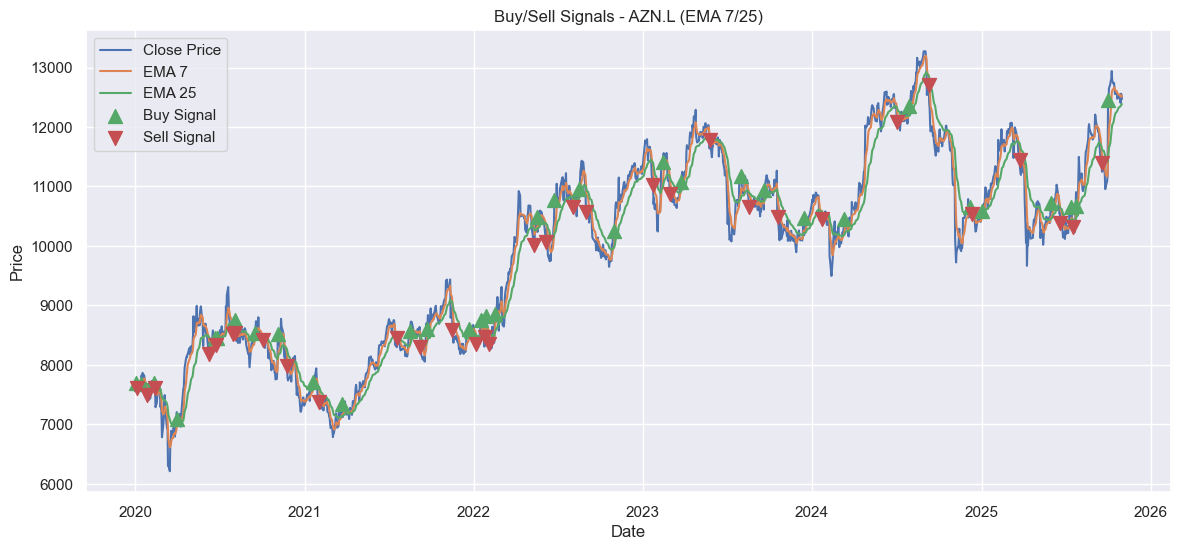

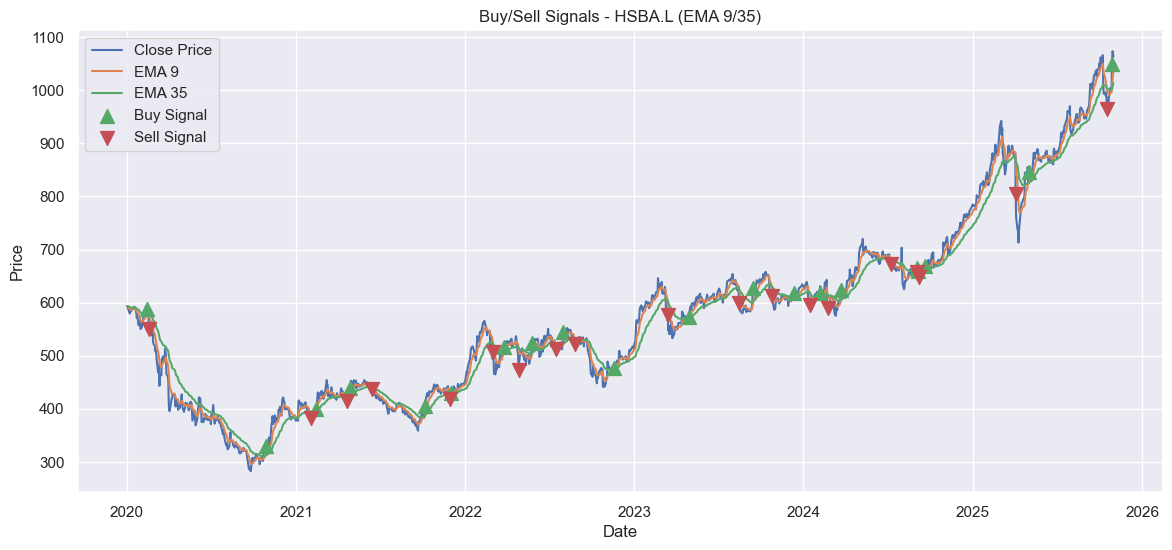

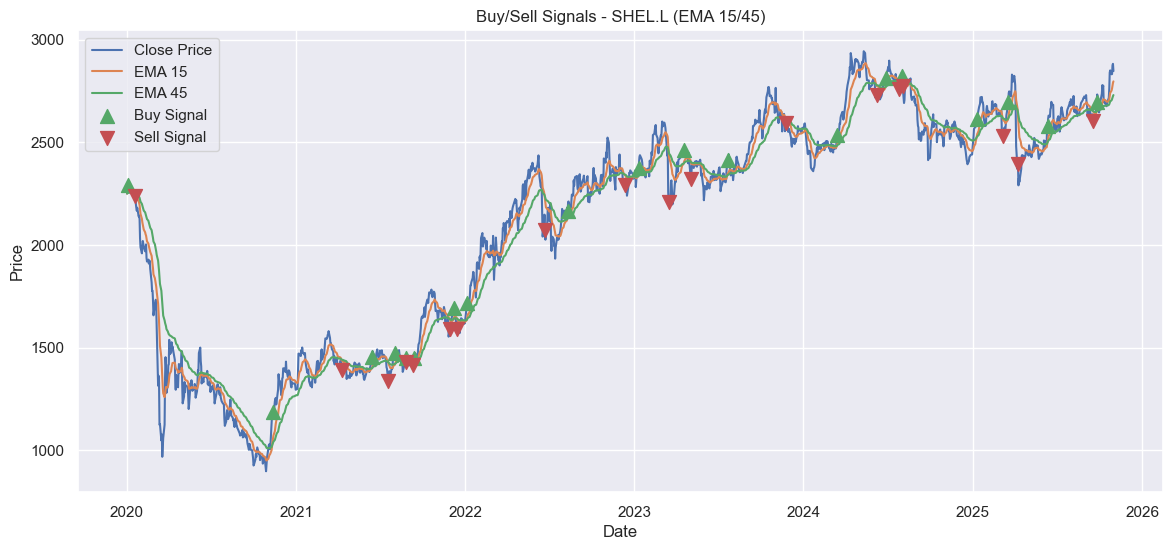

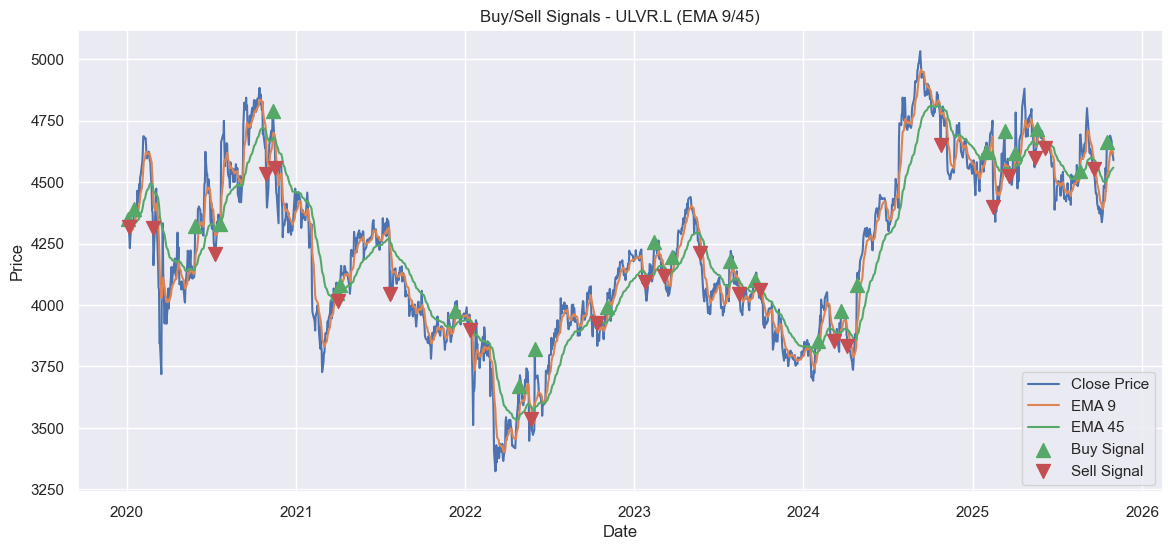

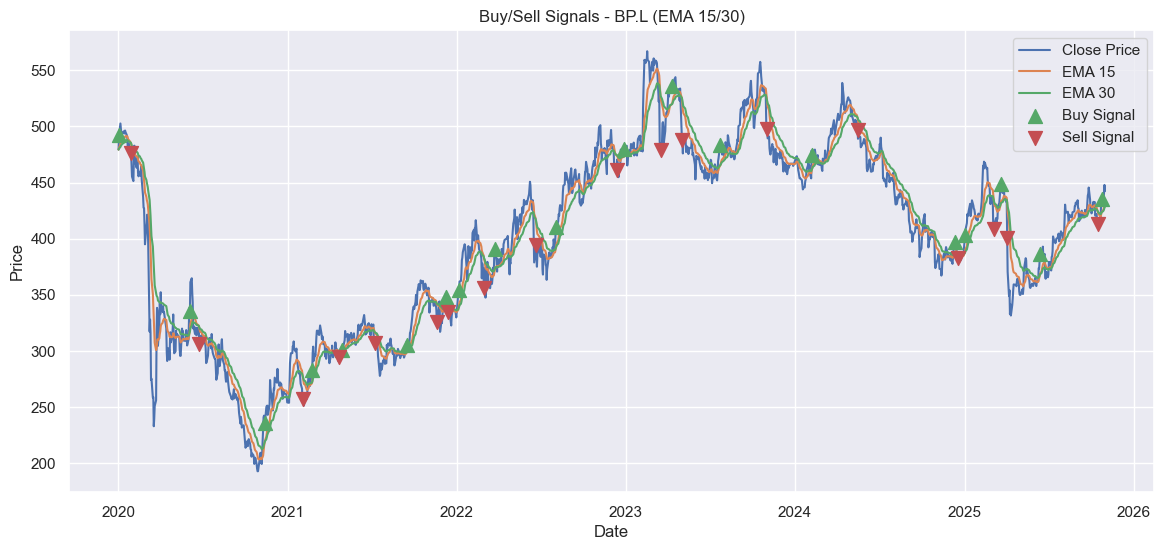

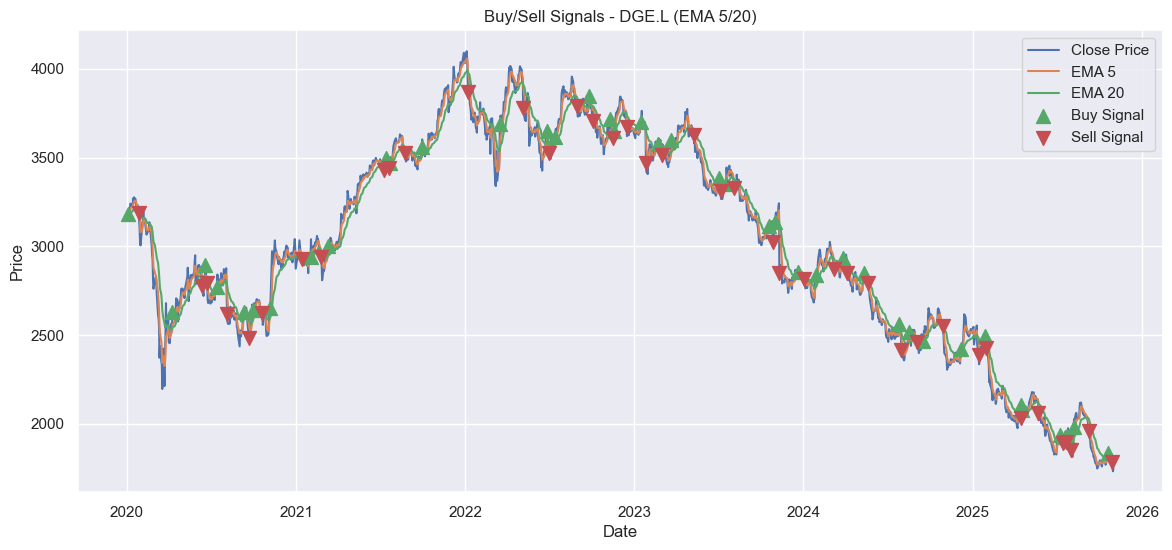

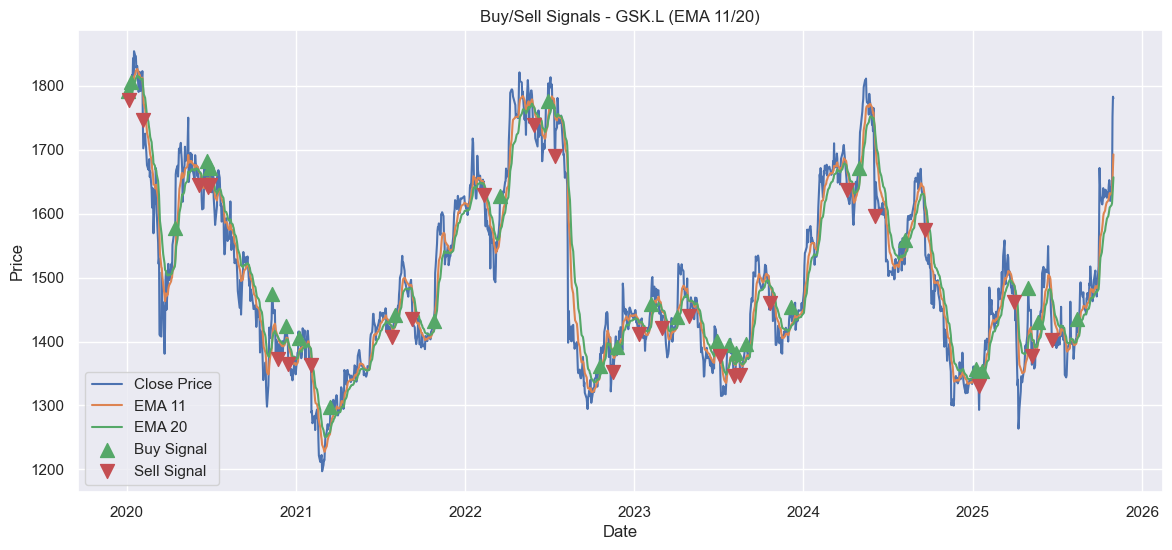

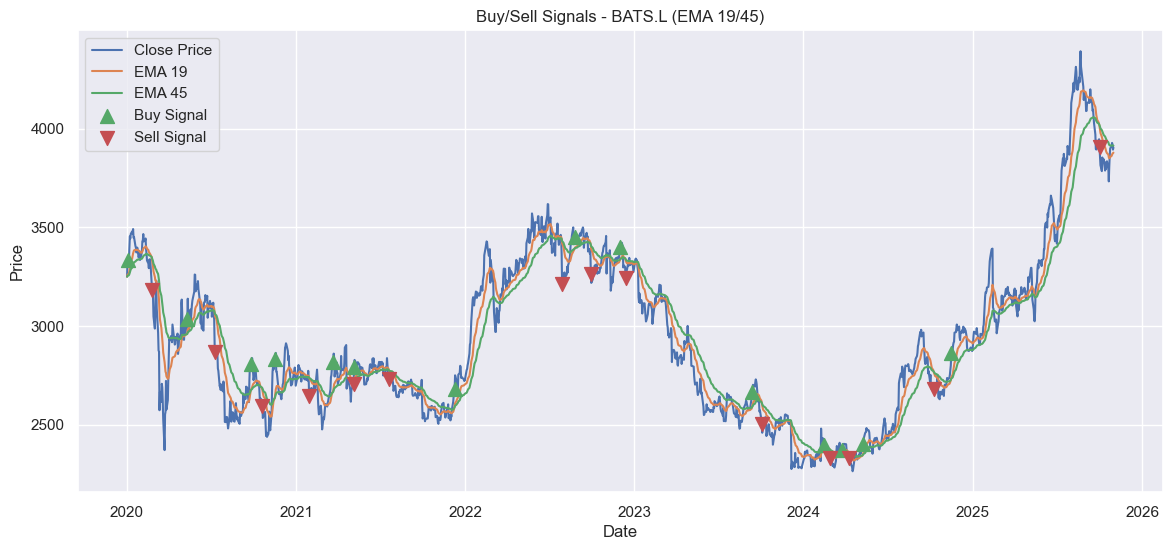

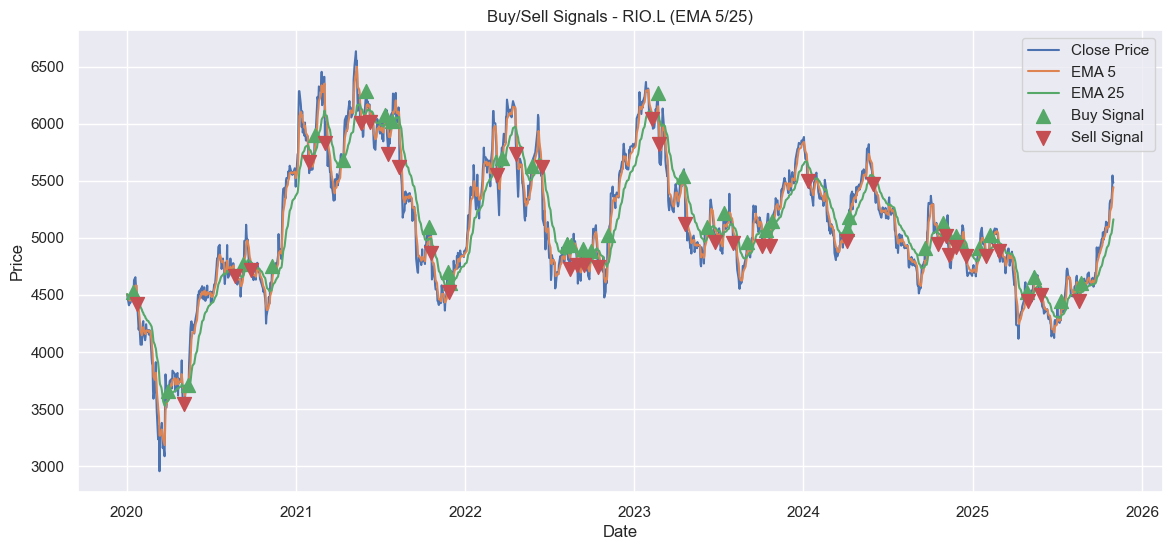

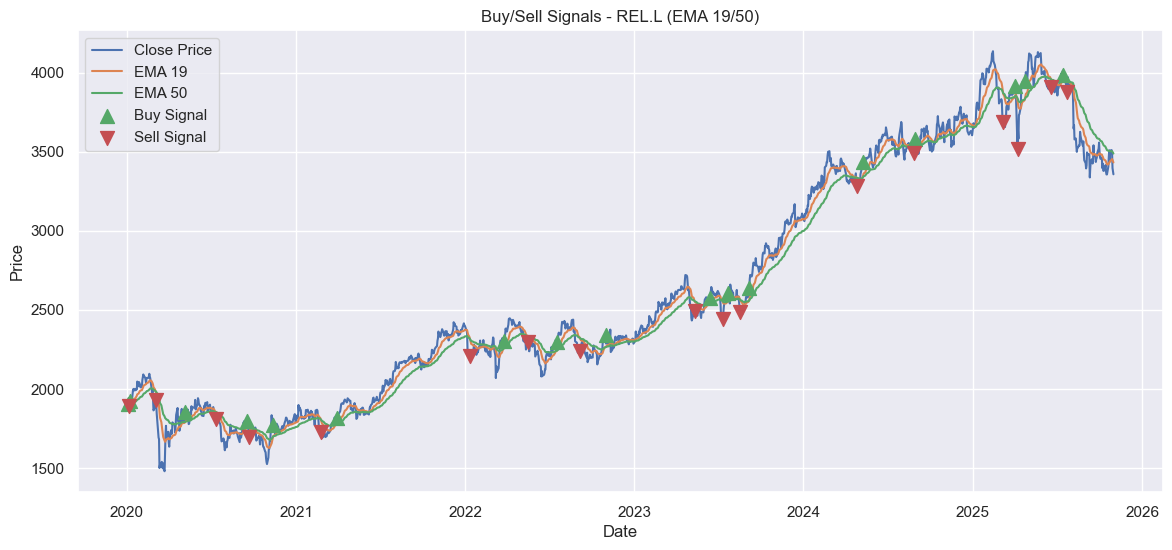

In [45]:
# Plot buy / sell signals for all tickers using best EMA parameters
for ticker in tickers:
    signals = all_signals[ticker]
    best_short = int(summary_df.loc[summary_df['Ticker'] == ticker, 'Best Short EMA'].iloc[0])
    best_long = int(summary_df.loc[summary_df['Ticker'] == ticker, 'Best Long EMA'].iloc[0])
    
    plt.figure(figsize=(14,6))
    plt.plot(signals['Close'], label='Close Price')
    plt.plot(signals[f'EMA_{best_short}'], label=f'EMA {best_short}')
    plt.plot(signals[f'EMA_{best_long}'], label=f'EMA {best_long}')
    
    buy_signals = signals[signals['Position'] == 1]
    sell_signals = signals[signals['Position'] == -1]
    
    plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', s=100, label='Buy Signal', zorder=5) 
    plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', s=100, label='Sell Signal', zorder=5) 
    
    plt.title(f'Buy/Sell Signals - {ticker} (EMA {best_short}/{best_long})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


In [46]:
print(signals.columns)
print(f"Print best and long, EMA_{best_short}, EMA_{best_long}")

Index(['Close', 'EMA_19', 'EMA_50', 'Signal', 'Position', 'Strategy_Returns',
       'Cumulative'],
      dtype='object')
Print best and long, EMA_19, EMA_50


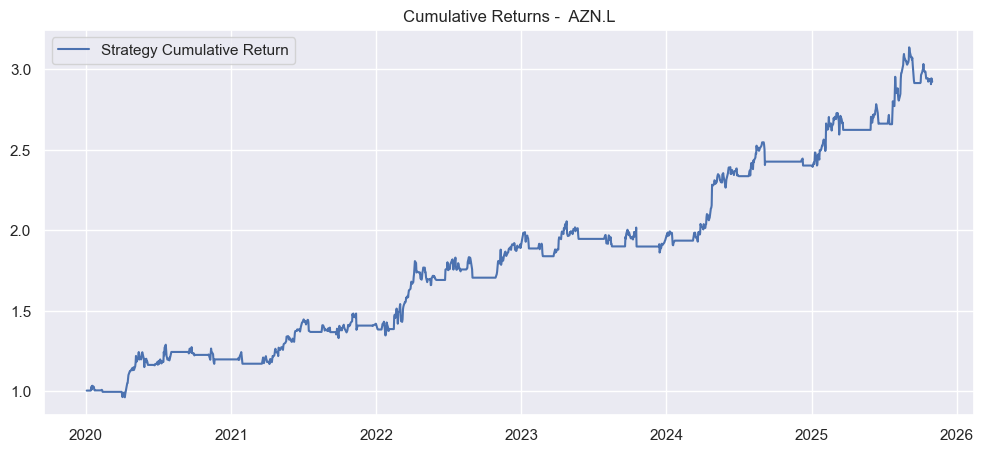

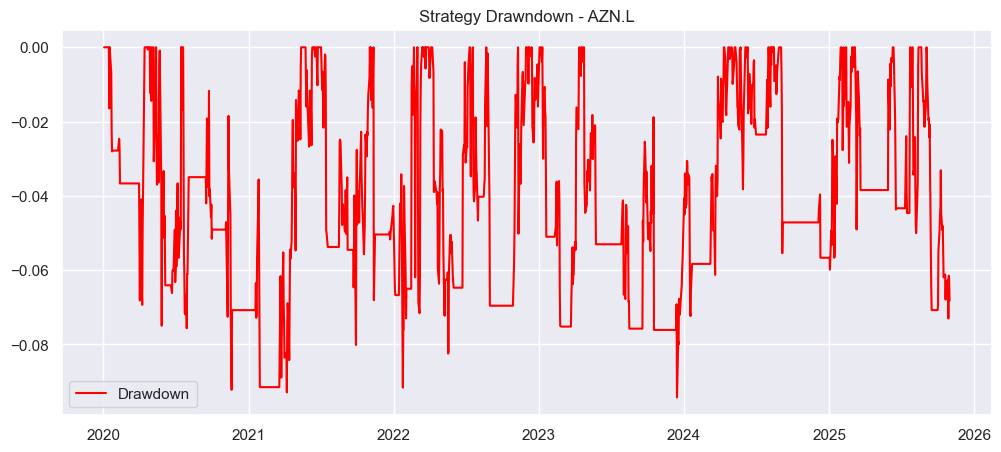

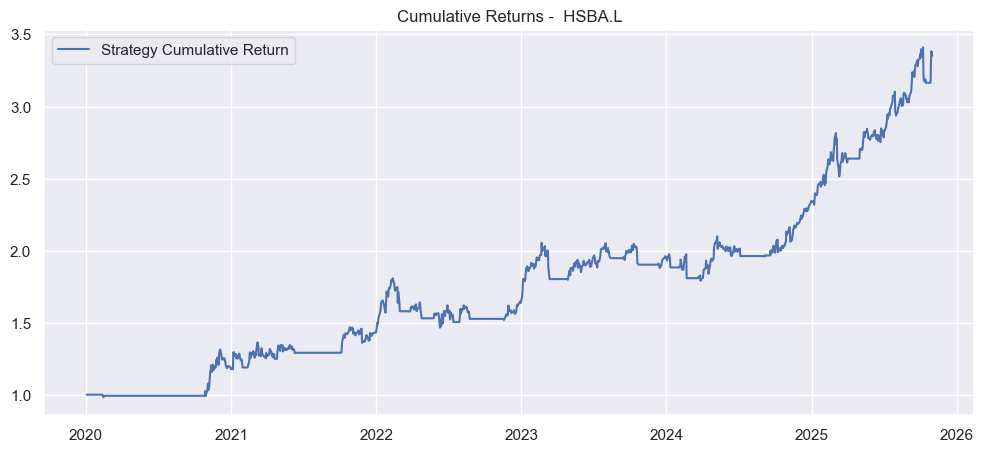

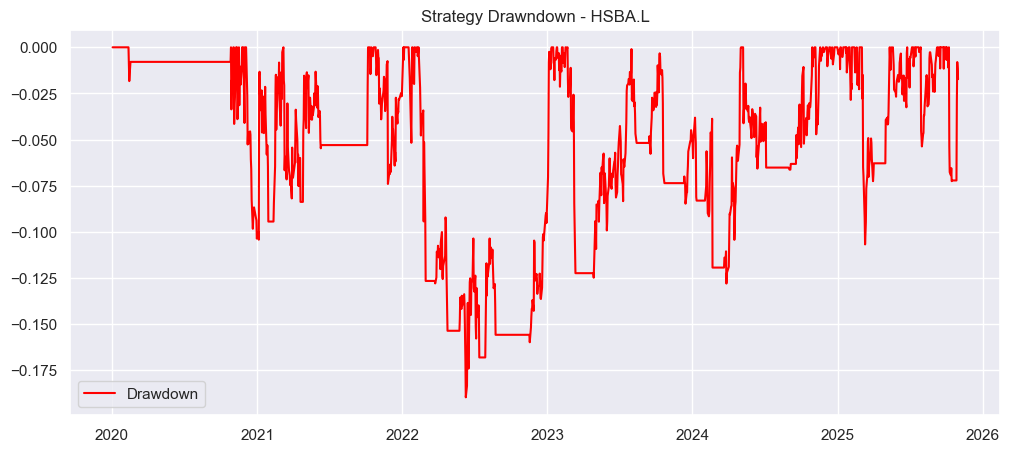

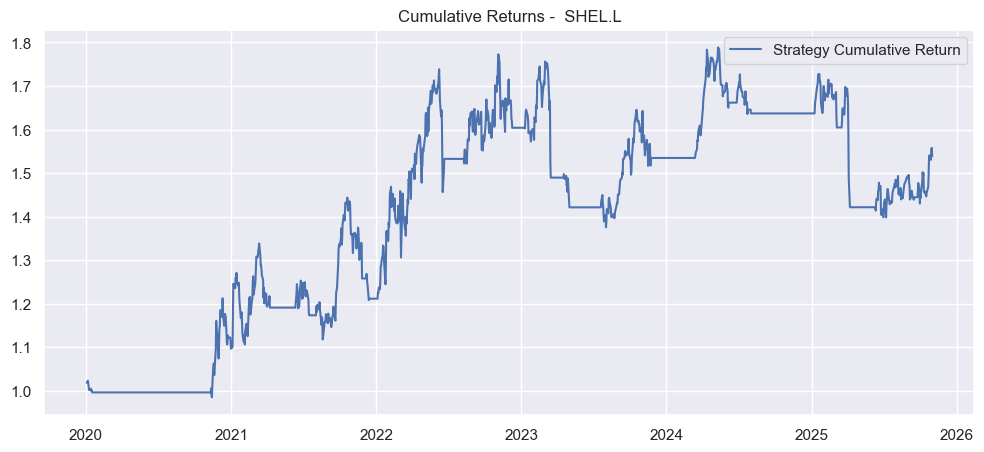

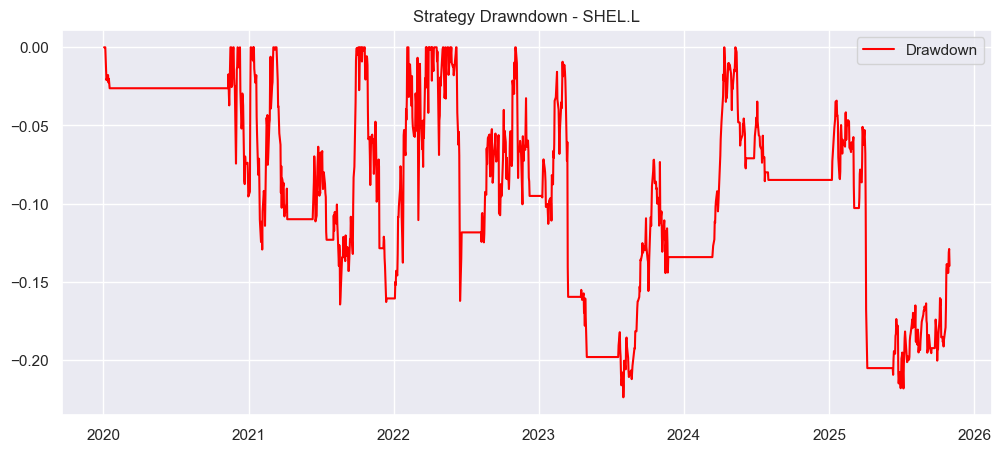

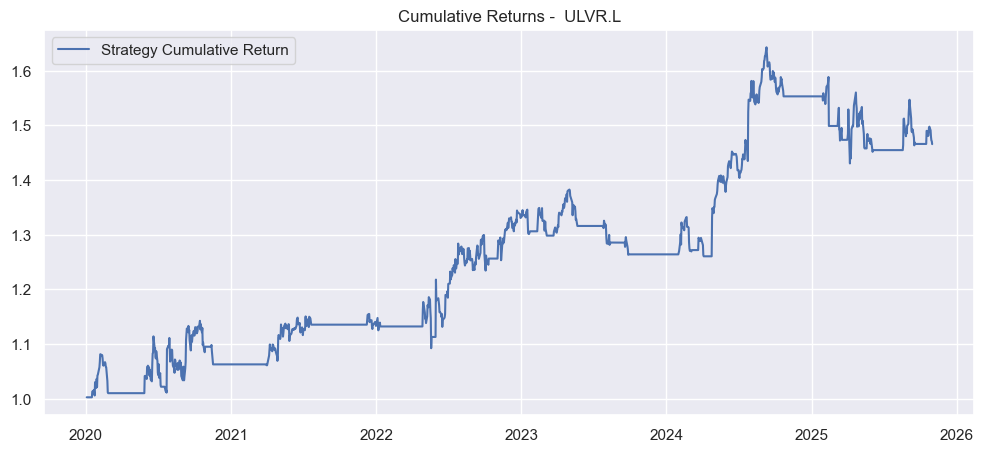

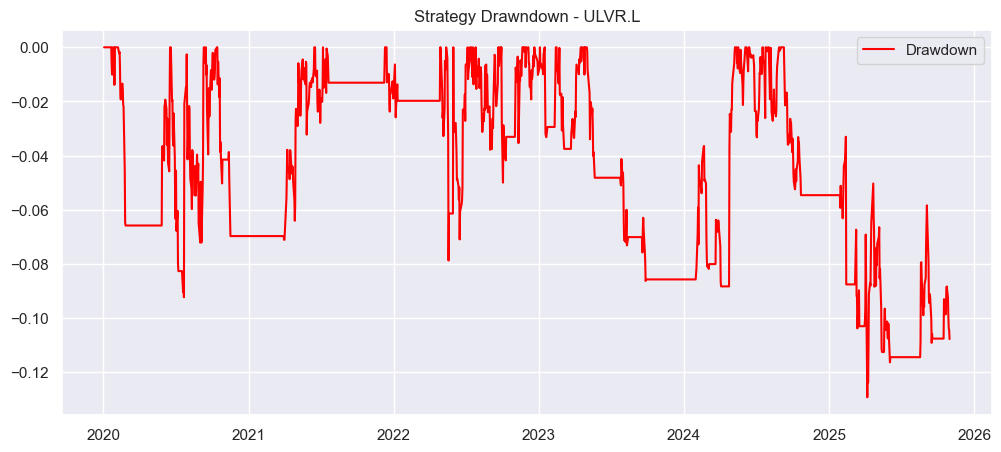

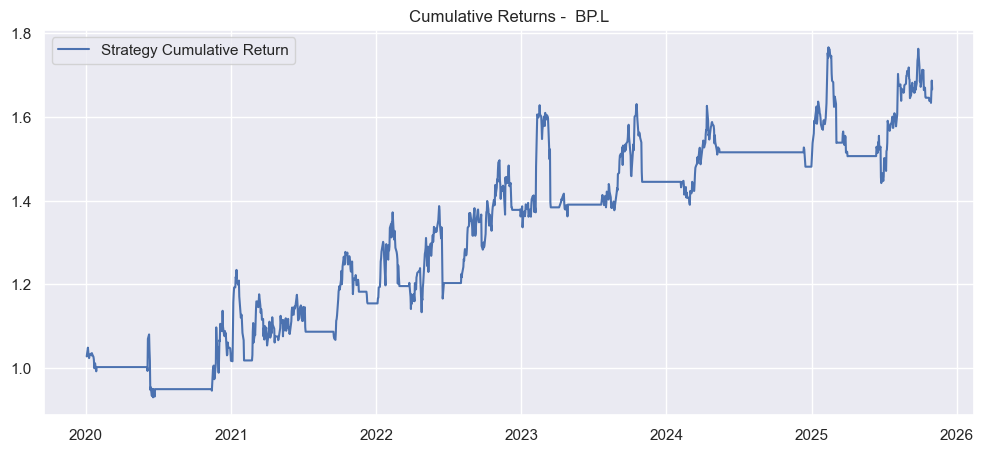

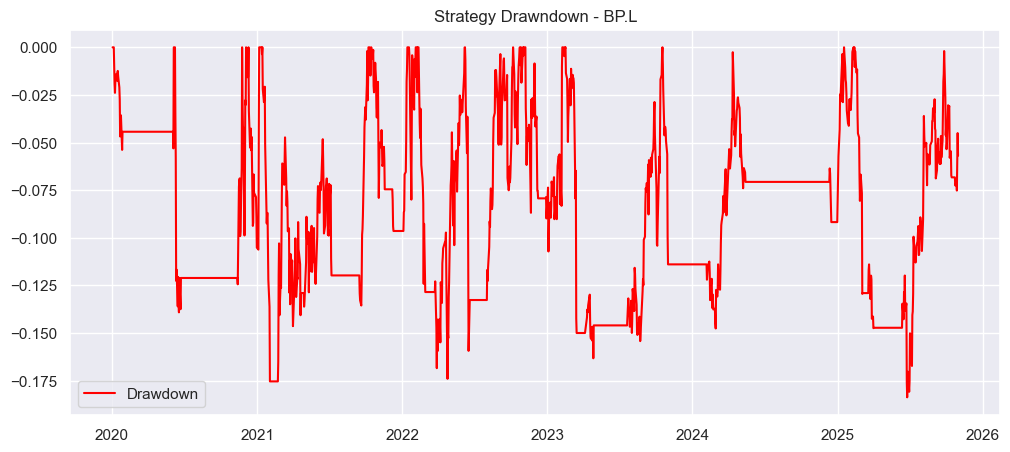

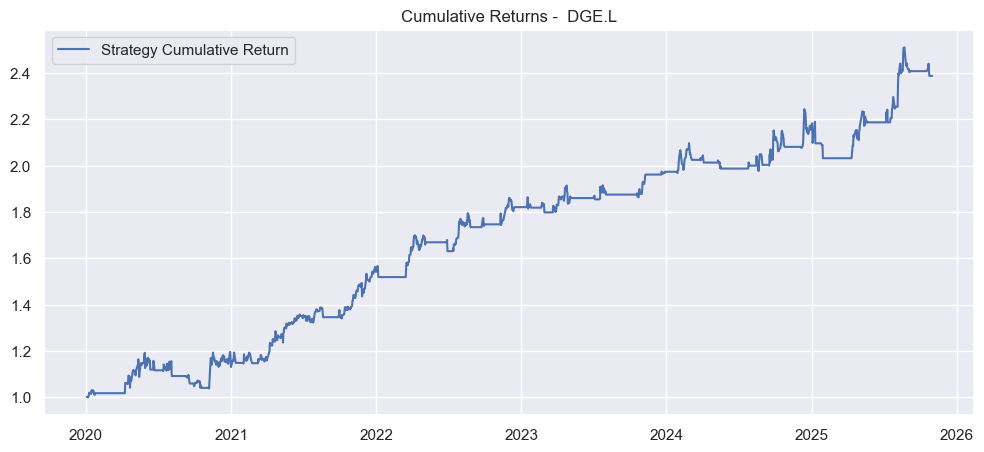

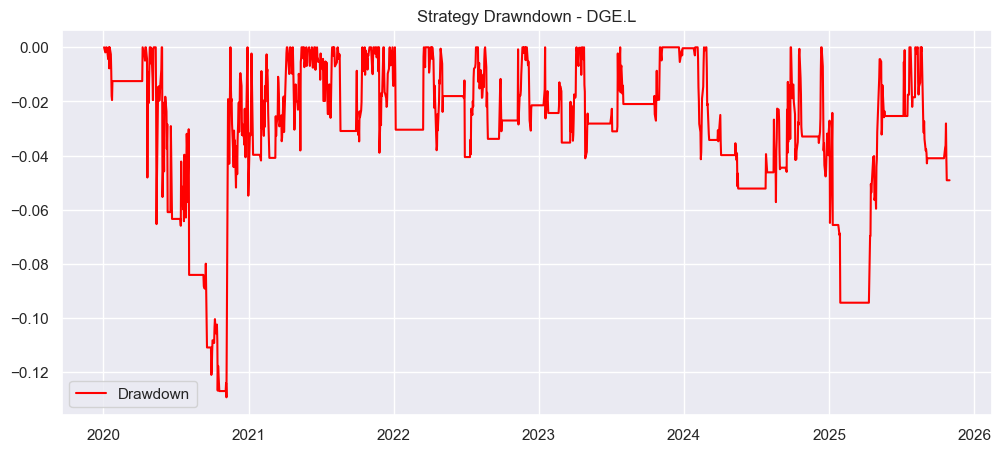

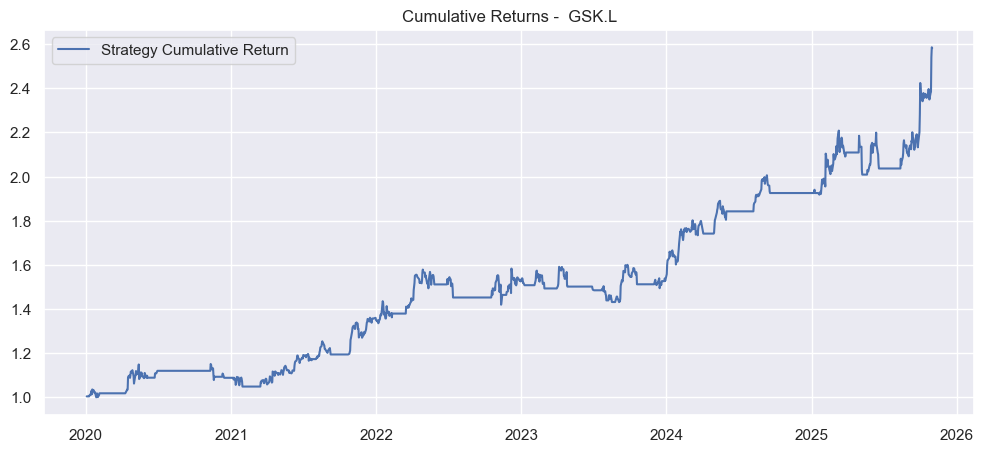

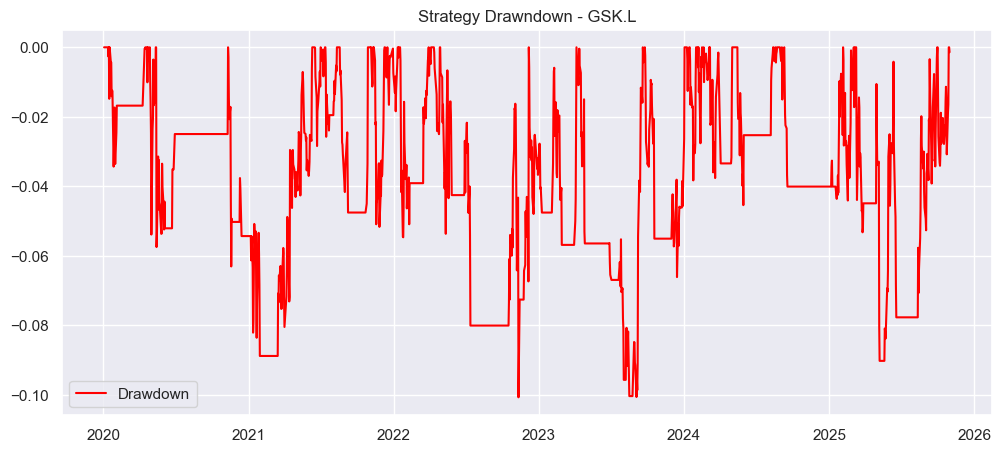

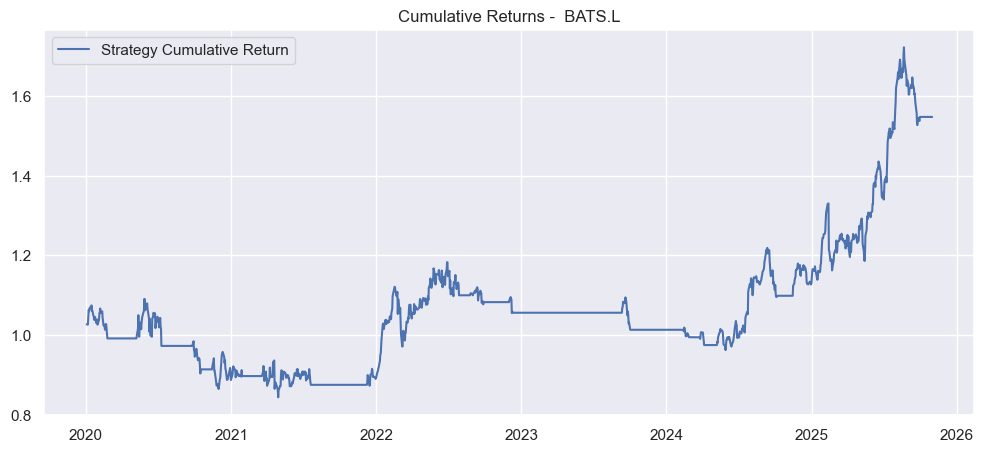

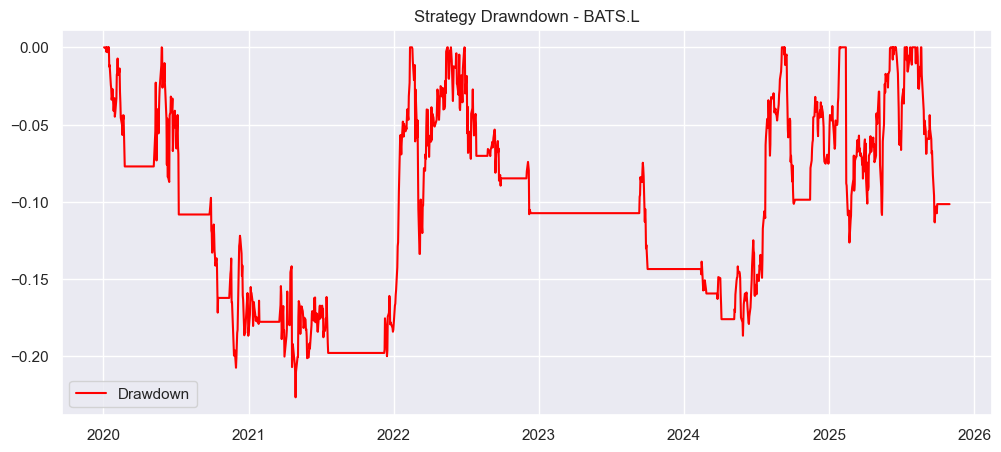

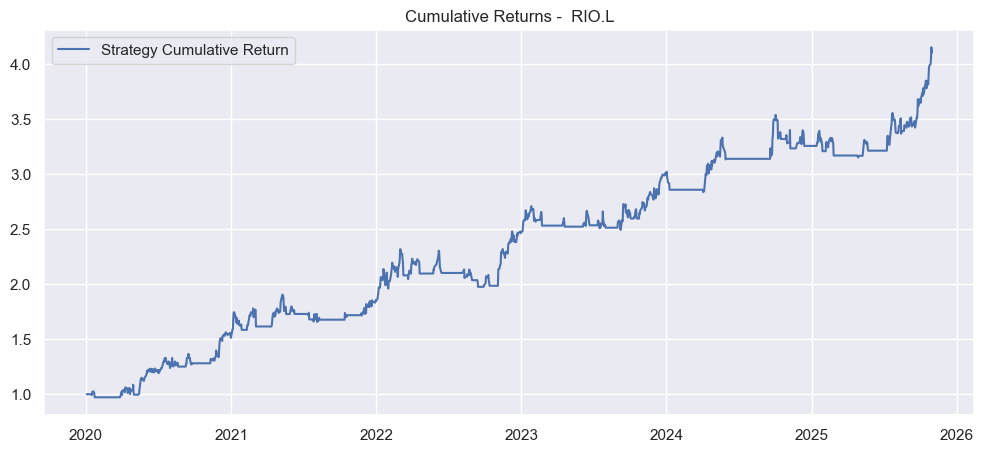

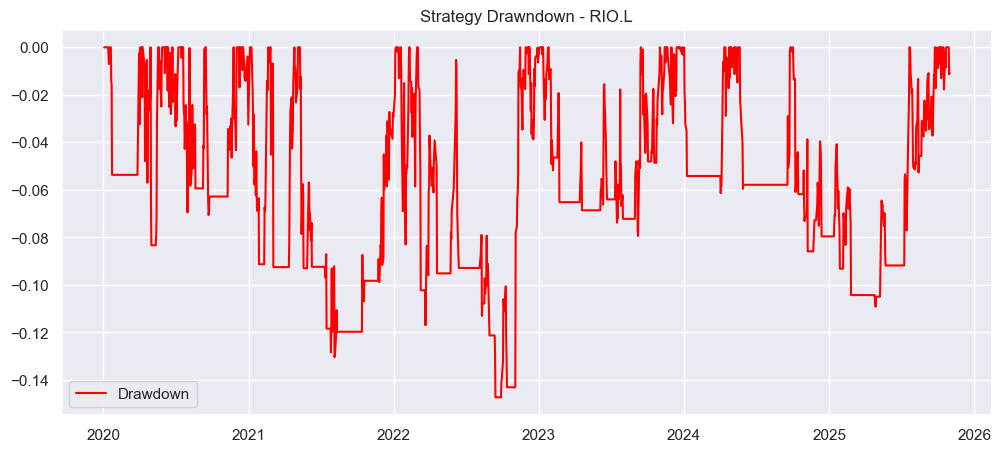

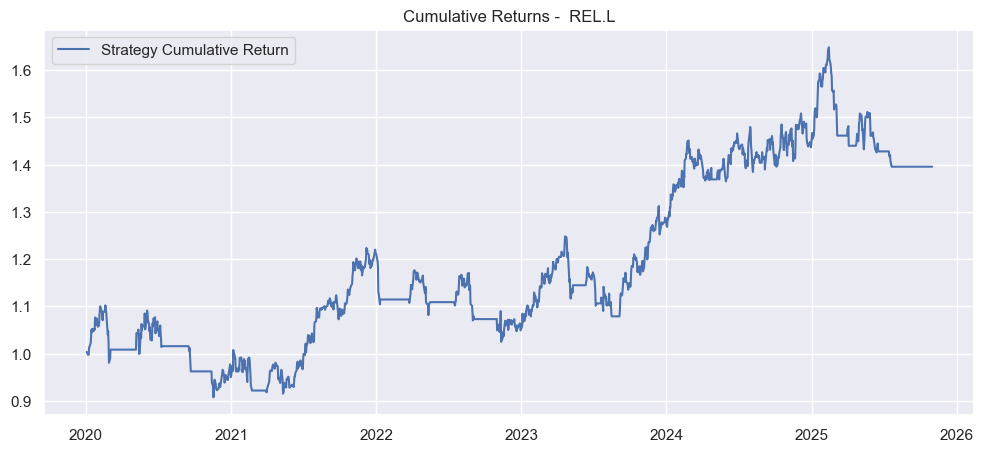

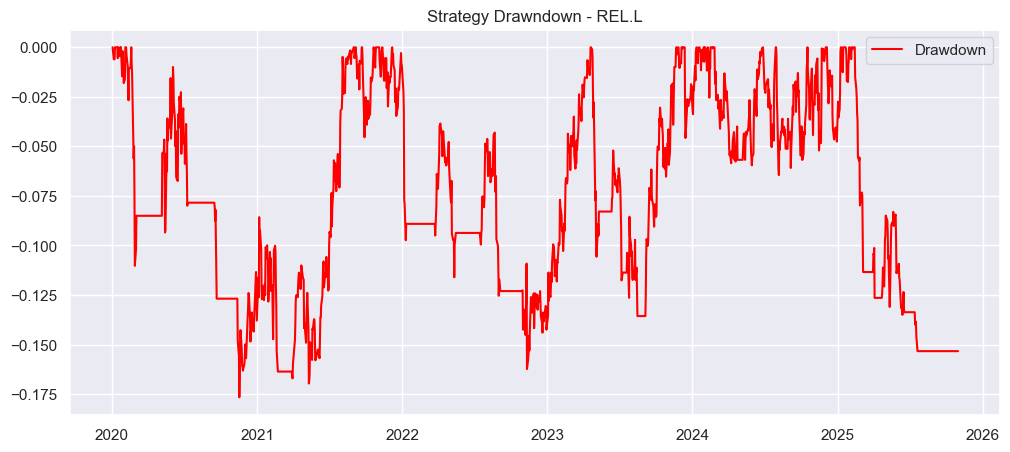

In [49]:
#Plot the cumulative return and drawdown for each ticker

for ticker in tickers:
    signals = all_signals[ticker]
    cum_max = signals['Cumulative'].cummax()
    drawdown = (signals['Cumulative'] - cum_max) / cum_max
    
    plt.figure(figsize=(12,5))
    plt.plot(signals['Cumulative'], label="Strategy Cumulative Return")
    plt.title(f"Cumulative Returns -  {ticker}")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.plot(drawdown, color='red', label='Drawdown')
    plt.title(f'Strategy Drawndown - {ticker}')
    plt.legend()
    plt.show()